# Emulate

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 22](https://img.shields.io/badge/Jump%20to-Level%2022-blue?style=flat-square)](http://www.pythonchallenge.com/pc/hex/copper.html)

<center><img src="../../resources/imgs/Quiz22-1.png" /></center>

&emsp;&emsp;先看看关卡源代码：

In [1]:
from requests import get
from bs4 import BeautifulSoup as Soup

In [2]:
response = get(
    'http://www.pythonchallenge.com/pc/hex/copper.html',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
response = Soup(response.text, features='html5lib')
print(response.center.contents[4].strip())

or maybe white.gif would be more bright


&emsp;&emsp;关卡中的注释提示我们`white.gif`可能会更加明亮。那把它显示出来看看？

In [3]:
from IPython.display import display
from io import BytesIO
from PIL import Image

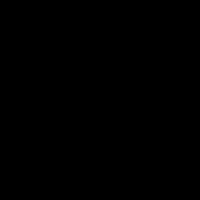

In [4]:
response = get(
    'http://www.pythonchallenge.com/pc/hex/white.gif',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
response = Image.open(BytesIO(response.content))
display(response)

&emsp;&emsp;嗯？为什么是黑的？不是`white.gif`吗？纯黑色的像素值，那么尝试获取每一帧中像素值不为0的坐标。

In [5]:
import pandas

In [6]:
k = 0
sequence = []
while True:
    try:
        response.seek(k)
        for x in range(response.size[0]):
            for y in range(response.size[1]):
                pixel = response.getpixel((x, y))
                if pixel != 0:
                    sequence.append((x, y, pixel))
        k += 1
    except:
        break
sequence = pandas.DataFrame(sequence, columns=['x', 'y', 'pix'])
print(sequence)

       x    y  pix
0    100  100    8
1    100  102    8
2    100  102    8
3    100  102    8
4    100  102    8
..   ...  ...  ...
128   98  100    8
129   98  100    8
130   98  100    8
131   98  100    8
132   98   98    8

[133 rows x 3 columns]


&emsp;&emsp;现在，我们得到了动态图133帧中每帧微亮像素点的坐标。试着看看这些值有没有什么不同。

In [7]:
print(sequence.groupby(by=['x', 'y']).count())

         pix
x   y       
98  98     5
    100   25
    102    6
100 98    14
    100    5
    102   31
102 98     9
    100   28
    102   10


&emsp;&emsp;表格中的坐标共9种，结合关卡主图（一个游戏摇杆），大致判断这些坐标是用来表达方位的。

In [8]:
image = Image.new(response.mode, (130, 30))
coordinate = [-20, 15]
for row in sequence.itertuples(index=False):
    if row[:2] == (100, 100):
        coordinate[0] += 25
        coordinate[1] = 15
    else:
        coordinate[0] += (row[0] - 100) // 2
        coordinate[1] += (row[1] - 100) // 2
    image.putpixel(coordinate, 255)
display(image)

&emsp;&emsp;根据方位指示画出图形，可以在图片中看到单词`bonus`，所以下一关的链接为<http://www.pythonchallenge.com/pc/hex/bonus.html>。